# **Neural Networks for Data Science Applications (2019/2020)**
***
* **Students**: Gentile Paolo (1877569), Toma Davide (1653447)
* **Reference paper**: Graph Attention Networks (Veličković et al., ICLR 2018): https://arxiv.org/abs/1710.10903
***



# Report

The authors of this paper define a neural network architecture for graph-structured data in order to improve the defects of simple graph convolutional networks (GCNs). 



## Why graph convolution?




Since graphs can be intended as *irregular spatial structures* it would be ideal to adapt some convolutional operator (as it happens with images in CNNs) to operate over graphs. However graph structures include several characteristics that make this task very challenging. For instance, in an arbitrary graph you can have an arbitrary number of neighbours for each node, we can not just fix a filter size and apply it. Or even assuming that each node of our graph has a fixed number of neighbours, it's still difficult to define a convolutional layer on top of this since they are unordered (in images each pixel is “connected” to its eight neighbouring pixels - upper-right, bottom-left, right, left, ecc... - in a graph there is no such ordering structure between neighbouring nodes).



## The "ideal" convolutional operator

So first of all the authors of the paper define the characteristics of an ideal convolutional operator for GCNs. The main properties of this operator are:

* **Efficiency**: it should be efficient in terms of computational and storage power, requiring no more than *O(V+E)* time and memory;

* **Indipendency**: either we have a graph of 1k nodes or 1M nodes, the number of parameters should be fixed. This is trivial for image convolution, where, for instance, if we have a 3x3 filter for every convolutional filter we have 9 fixed parameters;

* **Localized** : it should be preferable to act on local neighbours of a node, nodes that are 1 or 2 edges away from it;

* **Arbitrary importances** : since the neighbours are unordered, how do we decide to give one weight to a node or to another one? In normal convolution we have the relative distance between each pixel. With graphs we should use feature vectors themselves to decide what weight to give to each node. This problem is solved by the authors using **self-attention** mechanism;

* **Applicability**: it should be applicable to arbitrary unseen graph structures.

# Graph Attention Network

Attention mechanisms are incorporated to GCNs in order to make sure that only specific edges in the graph are used in the training process. The attention weights have to be learned, which are informative of the usefulness of the edge.

Each attention layer of the presented network is characterized by:

* Input features: $$\overrightarrow{h}=\left\{\vec{h}_{1}, \vec{h}_{i}, \ldots, \vec{h}_{N}\right\}, \vec{h}_{i} \in \mathbb{R}^{F} [1]$$

* Output features: $$\overrightarrow{h}^{\prime}=\{\overrightarrow{h_{1}^{\prime}}, \overrightarrow{h_{i}^{\prime}}, \ldots, \overrightarrow{h_{N}^{\prime}}\}, \overrightarrow{h_{i}^{\prime}} \in \mathbb{R}^{F^{\prime}} [2]$$

* Aggregation, how we weight and combine the neighbouring node features together: $$\overrightarrow{h_{i}^{\prime}}=\sigma\left(\sum_{j \in \mathcal{N}_{i}} \alpha_{i j} \boldsymbol{W} \vec{h}_{j}\right) [3]$$

with:

+ $N$ = the number of nodes of the graph;

+ $F$ and $F^{\prime}$ =  the dimensions of the input and the output;

+ $W$ = the weight matrix with dimension $F \times F^{\prime} $; 

+ $\mathcal{N}_{i}$ = the neighbourhood of node $i$,

+ $\sigma$ = the activation fuction;

+ $\alpha_{i j}$ = the weighting factor.

A shared linear transformation given by a weight matrix $W$ is applied to all nodes. Then self-attention is performed on all nodes by computing attention coefficients given by,

$$e_{i j}=\text { LeakyReLU }\left(a^{T}\left[\boldsymbol{W} \vec{h}_{i} \| \boldsymbol{W} \vec{h}_{j}\right]\right) [4]$$ 
This coefficient indicates the importance of node $j$’s features to node $i$, $e_{i j}$ is computed for first-order neighbors of $i$ (**masked attention**) and that’s where the graph structure is imposed in the model.

To make coefficients easily comparable across different nodes they are normalized using a softmax function:
$$\alpha_{i j}=\operatorname{softmax}_{j}\left(e_{i j}\right)=\frac{\exp \left(e_{i j}\right)}{\sum_{k \in \mathcal{N}_{i}} \exp \left(e_{i k}\right)} [5]$$

The attention mechanism $a$ is a parameter that needs to be learned. The choice of the attention mechanism is arbitrary. The authors of the paper have chosen to use a simple single-layer feedforward neural network. 

To stabilise the learning process of self-attention, the authors have proved **multi-head attention** to be very efficient. Specifically the operations of the layer are replicated indipendently $K$ times, each time with different parameters and the outputs are concatenated or added with the exception of the last layer that uses average instead,
$$\overrightarrow{h^{\prime}}_{i}=\|_{k=1}^{K} \sigma\left(\sum_{j \in \mathcal{N}_{i}} \alpha_{i j}^{k} \boldsymbol{W}^{k} \vec{h}_{j}\right) [6]$$

This setup fully satisfies a Graph Attention Layer.




## Transductive and Inductive Learning

To test the model, the authors have used two different node classification tasks: transductive and inductive learning. They have performed them both on different benchmarks.

The main difference between them is that during transductive learning, you have already encountered both the training and testing datasets when training the model. However, inductive learning encounters only the training data when training the model and applies the learned model on a dataset which it has never seen before. 

Transduction does not build a predictive model. If a new data point is added to the testing dataset, then we will have to re-run the algorithm from the beginning, train the model and then use it to predict the labels. On the other hand, inductive learning builds a predictive model. When you encounter new data points, there is no need to re-run the algorithm from the beginning.


# The project

Our goal is to implement the same architecture as described in the paper (paper's section 3.3), using Tensorflow, in order to get comparable results. 

The project proposed presents a node classification task. Taken as inputs the adjacency matrix of the graph $A \in \mathbb{R}^{N \times N}$ and the node features $\boldsymbol{f}=\left\{\vec{f}_{1}, \vec{f}_{i}, \ldots, \vec{f}_{N}\right\}, \vec{f}_{i} \in \mathbb{R}^{F}$, the algorithm classifies every single node of the given graph.

For this project we are going to deal with the transductive task. So our training algorithm can see the whole input graph, all the nodes, all nodes' features, but it is only given part of the labels of the nodes.

We are evaluating GAT's performances on two datasets *Cora* and *Citeseer* [(Sen et al., 2008)](https://www.aaai.org/ojs/index.php/aimagazine/article/view/2157), we couldn't use *Pubmed* due to run-time memory limitations. We have encountered the same issues using also other benchmarks not present in the paper (social network circles).


# Data

Both datasets constist of a collection of scientific publications classified into different classes. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary.
For both datasets, the papers were selected in a way such that in the final corpus every paper cites or is cited by at least one other paper (no disconnected subgraphs).
This is a summary of the two datasets:

|                        | Cora | Citeseer |
|:----------------------:|:----:|:--------:|
|       # **Nodes**      | 2708 |   3327   |
|       # **Edges**      | 5429 |   4732   |
|  # **Features/Node**   | 1433 |   3703   |
|      # **Classes**     |   7  |     6    |
|  # **Training Nodes**  |  140 |    120   |
| # **Validation Nodes** |  500 |    500   |
|    # **Test Nodes**    | 1000 |   1000   |


In [1]:
!pip uninstall tensorflow tensorflow-tensorboard tensorflow-estimator &> /dev/null

y
y


In [2]:
!pip install tensorflow &> /dev/null

y


In [12]:
# Loading preprocessing module from local

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving process_data_official_.py to process_data_official_.py
User uploaded file "process_data_official_.py" with length 6413 bytes


In [13]:
# Importing the necessary libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder    # to generate one-hot encodes of the classes
from sklearn.manifold import TSNE                 # to generate the t-SNE plot

import tensorflow as tf

from tensorflow.keras import Model, activations, losses, metrics 
from tensorflow.keras.layers import Layer, Input, Activation, Dropout, LeakyReLU, Softmax, ELU # all tenforflow utilities, necessary for building the model 
from tensorflow.keras.optimizers import Adam # as optimizer we use Adam
from tensorflow.keras.regularizers import l2 # for regularization, we use l2 norm

from preprocess_data import preprocess_features, load_data_citeseer, load_data_cora # module responsible for loading and processing the data from raw files into graph, for citeseer dataset code adapted from  https://github.com/tkipf/gcn.

import matplotlib.pyplot as plt
%matplotlib inline

# **CORA**

In [7]:
# Loading cora.zip from local

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cora.zip to cora.zip
User uploaded file "cora.zip" with length 185370 bytes


In [8]:
!unzip -o cora.zip &> /dev/null

In [9]:
# Encoding the labels and then converting them to one-hot encoding
def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = tf.keras.utils.to_categorical(labels)
    return labels, label_encoder.classes_

In [15]:
N, labels, A, X, train_mask, val_mask, test_mask = load_data_cora() 

# N: number of edges in the graph
# labels: classes of nodes
# A: adjacency matrix
# X: matrix features; each row is a node and each column is a word 
# train_mask, val_mask, test_mask: boolean array with the mask for train, validation and test set

In [16]:
# used for the classification report
labels_encoded, classes = encode_label(labels)

Now we implement two classes to build the graph attention layer:

1) **Attention class**: this class implement the attention mechanism as described in the paper.

2) **GAT class**: this class build the layer and uses the attention mechanism of the attention class and distinguishes the case if this is the last layer or one of the previous layers by averaging or concatenating the output of the attention mechanism.

For the first class, in our specific case, we perform the self attention on the nodes using a shared attentional mechanism  $$e_{i j}=\text { LeakyReLU }\left(a^{T}\left[\boldsymbol{W} \vec{h}_{i} \| \boldsymbol{W} \vec{h}_{j}\right]\right)$$ that by means of the weight vector a and the LeakyRelu activation function generates the coefficents $e_{ij}$. In the end of the attention mechanism, we apply Softmax to get the final normalized (comparable) attention coefficients: $$\alpha_{i j}=\operatorname{softmax}_{j}\left(e_{i j}\right)=\frac{\exp \left(e_{i j}\right)}{\sum_{k \in \mathcal{N}_{i}} \exp \left(e_{i k}\right)} $$

For the second class, as described in the paper, thanks to the parameter of the GAT class, we have the possibility to declare explicitly K to use the multi-head attention mechanism:

$$\overrightarrow{h^{\prime}}_{i}=\|_{k=1}^{K} \sigma\left(\sum_{j \in \mathcal{N}_{i}} \alpha_{i j}^{k} \boldsymbol{W}^{k} \vec{h}_{j}\right)$$

The multi-head attention mechanism is implemented in order to stabilize the attention mechanism and to parallelize eventually this operation.

In [17]:
# Create attention

class Attention(Layer):

  '''
  Class responsible for implementing the attention mechanism employed by the model, parametrized
  by a weight vector 'a' and applying a LeakyReLU activation. [eq 4-5] 
  '''

  def __init__(self, F_1, kernel_regularizer, dropout_rate, **kwargs):

    '''
    Parameters
    ----------
    F_1 : int
        output features
    kernel_regularizer : tf.regularizer
        Regularizer, we'll apply l2 norm
    dropout_rate  : float
        Fraction of the input units to drop.
    '''

    self.F_1 = F_1 # Output features (F' in the paper)
    self.kernel_regularizer = kernel_regularizer # A regularizer that applies a L2 regularization penalty. The L2 regularization penalty is computed as: loss = l2 \* reduce_sum(square(x))
    self.dropout_rate = dropout_rate
    self.input_dropout = Dropout(self.dropout_rate)
    self.output_dropout = Dropout(self.dropout_rate)
    super(Attention, self).__init__(**kwargs)

  
  def build(self, input_shape):
    '''
    Creation of the weight matrix to linear transform the inputs
    and the attention kernels.
    In the paper:

    - W, dim:(F', F)
    - a , dim:(2, F', 1)

    '''
    F = input_shape[0][-1] # Input features (F in the paper)


    self.W = self.add_weight(name='W', 
                             shape=(self.F_1, F),
                             initializer='glorot_uniform',
                             regularizer=self.kernel_regularizer,
                             trainable=True) # weight matrix to linear transoform the feature matrix, with Xavier's initialization


    self.a = self.add_weight(name='a', 
                             shape=(2, self.F_1, 1),
                             initializer='glorot_uniform',
                             regularizer=self.kernel_regularizer,
                             trainable=True) # weight vector a, toapply attention

    super(Attention, self).build(input_shape)
   
  def call(self, inputs):
    X = inputs[0]                                         # Node features, dim:(N, F)
    A = inputs[1]                                         # Adjacency matrix, dim:(N, N)

    X = self.input_dropout(X)                             # Applying dropout to the input

    x_features = tf.matmul(X, self.W, transpose_b=True)   # (in the paper W x h), dim:(N, F')

    att_self = tf.matmul(x_features, self.a[0])           # self attention,  dim:(N, 1) 
    att_neighbours = tf.matmul(x_features, self.a[1])     # first degree neighbours attention, dim:(N, 1) 

    att = att_self + tf.transpose(att_neighbours)         # Attention head a(Wh_i, Wh_j) = a^T [[Wh_i], [Wh_j]], dim (N, N) 
    att = LeakyReLU(alpha=0.2)(att)                       # adding non-linearity, alpha value chosen as in the paper

    mask = -10e9 * (1.0 - A)                              # Mask values before activation ("Attention Is All You Need" - Vaswani et al., 2017)
    att_masked = att + mask  
    dense = Softmax(axis=0)(att_masked)                   # Apply softmax to get attention coefficients (in the paper alpha_ij), dim:(N, N)
    
    dense = tf.matmul(dense, x_features)                  # Linear combination with new neighbors' features, dim: (N, F') 

    dense = self.output_dropout(dense)                    # Applying dropout directly to the output

    return dense

class GAT(Layer):

  '''
  This will represent the actual layer structure, where the attention mechanisms is applied.
  '''
  
  def __init__(self, F_1, K, kernel_regularizer, dropout_rate, last=False, **kwargs):
    self.F_1 = F_1                                    # Output features (as previously)
    self.K = K                                        # Number of attention heads 
    self.kernel_regularizer = kernel_regularizer
    self.dropout_rate = dropout_rate
    self.last = last                                  # Boolean flag, to be triggered on the last GAT layer.
                                                      
    

    # Initialize weights for each attention head
    self.attentions = []
    for k in range(self.K):
      attention = Attention(self.F_1, self.kernel_regularizer, self.dropout_rate)
      self.attentions.append(attention)

      
    super(GAT, self).__init__(**kwargs)
  
  def build(self, input_shape):

    super(GAT, self).build(input_shape)
   
  def call(self, inputs):
    X = inputs[0]                                      # Node features, dim:(N, F)
    A = inputs[1]                                      # Adjacency matrix, dim:(N, N)

    attentions = [] #saving the output of the Attention class for each attention head 
    for k in range(self.K):
      attention = self.attentions[k]([X, A])
      attentions.append(attention)

    # Aggregate the attention heads' output according to the reduction method
    if self.last:
      h = tf.reduce_mean(tf.stack(attentions), axis=0)  # on the last layer we average the aggregated features
      h = Softmax()(h)                                  # dim:(N, F'), on the last layer we apply non-linearity with Softmax
    else:
      h = tf.concat(attentions, axis=1)                 # on all the intermediate layers we concatenate the features of each head
      h = ELU()(h)                                      # dim:(N, F'x K), exponential linearity applied to the concatenated features
    return h

In [19]:
def build_model(X, F_1, K, kernel_regularizer, num_layers, dropout_rate, n_classes, batch_size, learning_rate):

  """Function that builds the backbone of the architecture.
  Takes as input the hyperparameters and returns the model ready to be compiled.
  Important!! Specify num_layers > 1.

      Parameters
      ----------
      X : array
      F_1 : int
      K : int
      kernel_regularizer  : tf.regularizer
      num_layers  : int
      dropout_rate  : float
      n_classes : int

      Returns
      -------
      model: tf.functional
      """
  X_in = Input(shape=(X.shape[-1],)) 
  A_in = Input(shape=(batch_size,))
  h = X_in

  for _ in range(num_layers-1):

    h = GAT(F_1=F_1,
            K=K,
            kernel_regularizer=kernel_regularizer,
            last=False,
            trainable=True,
            dropout_rate=dropout_rate,
            input_shape=(X.shape[-1],))([h, A_in])

  h = GAT(F_1=n_classes,
            K=1,
            kernel_regularizer=kernel_regularizer,
            last=True,
            trainable=True,
            dropout_rate=dropout_rate,
            input_shape=(X.shape[-1],))([h, A_in])


  model = Model(inputs=[X_in, A_in], outputs=h)

  print(model.summary())

  return model

In [20]:
# Model definition (as per Section 3.3 of the paper)

'''
The first layer consists of K attention heads computing F' features each (for a total
of K x F' features) followed by an exponential linear unit (ELU). 

The second layer is used for classification: a single attention head that computes n_classes features,
followed by a Softmax activation.

Regularization is applied within the model. Furthermore dropout is applied to both layers inputs'.
'''
#These are the hyperparamethers tested for transductive learning task of the paper

epochs=10000                  # Number of training epochs
batch_size = X.shape[0]       # Number of nodes in the graph
n_classes = 7                 # Number of classes
F_1 = 8                       # Output size of GraphAttention layer
reg = l2(0.0005)              # Factor for l2 regularization
dropout_rate = 0.6            # Dropout rate between GAT layers
learning_rate= 0.005          # Learning rate for Adam
K = 8                         # Number of attention heads in GAT layer (with multihead attention)
num_layers = 2                # Number of layers

model = build_model(X, F_1, K, reg, num_layers, dropout_rate, n_classes, batch_size, learning_rate)



Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat (GAT)                       (None, 64)           91840       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
gat_1 (GAT)                     (None, 7)            462         gat[0][0]             

Epoch 1/10000
1/1 [==============================] - 1s 808ms/step - loss: 0.1812 - accuracy: 0.1263 - val_loss: 0.4417 - val_accuracy: 0.1496
Epoch 2/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1703 - accuracy: 0.1499 - val_loss: 0.4225 - val_accuracy: 0.2452
Epoch 3/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1602 - accuracy: 0.1643 - val_loss: 0.4079 - val_accuracy: 0.3564
Epoch 4/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1530 - accuracy: 0.1913 - val_loss: 0.3956 - val_accuracy: 0.4450
Epoch 5/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1419 - accuracy: 0.2201 - val_loss: 0.3845 - val_accuracy: 0.4985
Epoch 6/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1367 - accuracy: 0.2345 - val_loss: 0.3738 - val_accuracy: 0.5510
Epoch 7/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1305 - accuracy: 0.2478 - val_loss: 0.3635 - val_accuracy: 0.6045
Epoch

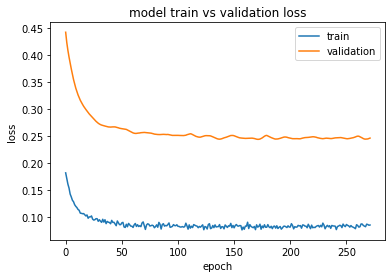

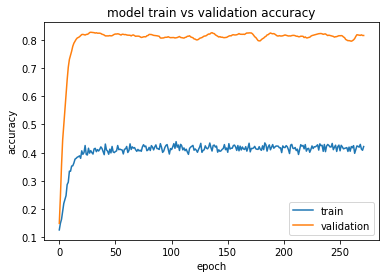

In [21]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), # Gradient based optimization method that is based on adaptive estimation of first-order and second-order moments, with decay.
              loss='categorical_crossentropy',
              metrics=['accuracy']) # We define the type of loss function (typical choice in classification task is categorical crossentropy) and the metrics to evaluate (the accuracy).

validation_data = ([X, A], labels_encoded, val_mask) # Preparing the validation set

callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)] # Defining early stopping procedure to avoid overfitting.
#tb_callback = TensorBoard(batch_size=batch_size)

hist = model.fit([X, A],
                labels_encoded,
                sample_weight=train_mask,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=validation_data,
                shuffle=False,
                callbacks = callback, 
                verbose=1) # Model training and evaluate on validation

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [22]:
eval_results = model.evaluate([X, A],
                              labels_encoded,
                              sample_weight=test_mask,
                              batch_size=batch_size,
                              verbose=0)

print('Done.\n'
      'Test loss: {}\n'
      'Test accuracy: {}'.format(*eval_results))

Done.
Test loss: 0.45357996225357056
Test accuracy: 0.8153619170188904


In [23]:
X_te = X[test_mask]
A_te = A[test_mask,:][:,test_mask]
y_te = labels_encoded[test_mask]

## t-SNE

Let’s now use t-SNE to visualize the hidden layer representations. We use t-SNE to reduce the dimension of the hidden representations to 2-D. Each point in the plot represents each node (or document), while each color represents each class.

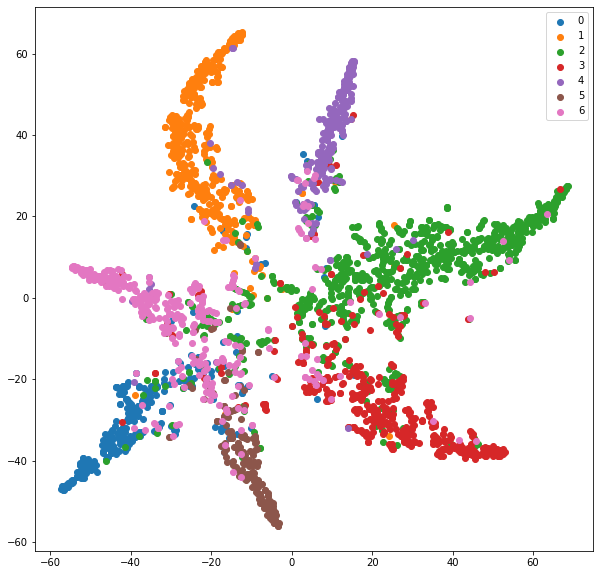

In [24]:
#Get the hidden layer representation after the first GAT layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict([X,A],batch_size=N)

#Get t-SNE Representation
x_tsne = TSNE(n_components=2).fit_transform(activations[3]) 

def plot_tSNE(labels_encoded,x_tsne):
    color_map = np.argmax(labels_encoded, axis=1)
    plt.figure(figsize=(10,10))
    for cl in range(n_classes):
        indices = np.where(color_map==cl)
        indices = indices[0]
        plt.scatter(x_tsne[indices,0], x_tsne[indices, 1], label=cl)
    plt.legend()
    plt.show()
    
plot_tSNE(labels_encoded,x_tsne)

## Grid-search

**We** have now used the settings and hyperparameters used by the authors to obtain the state of the art results in the paper, but now we try to implement a grid search on some hyperparameters, to show which are the changes in terms of losses and accuracies on train and validation:

2 0.5 0.01
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_2 (GAT)                     (None, 64)           91840       input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
gat_3 (GAT)                     (None, 7)            462         gat_2[0][0]

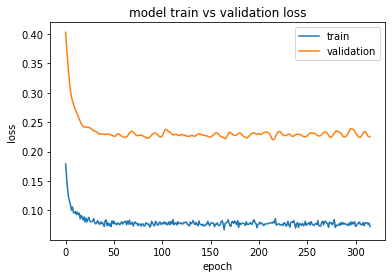

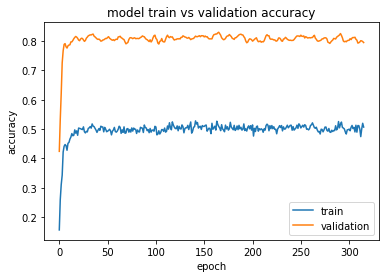

Done.
Test loss: 0.40788835287094116
Test accuracy: 0.7950516939163208
2 0.5 0.001
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_4 (GAT)                     (None, 64)           91840       input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
gat_

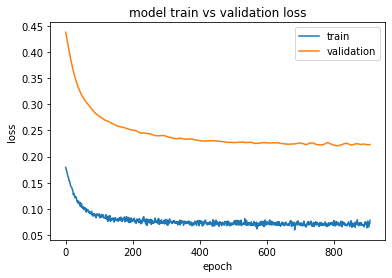

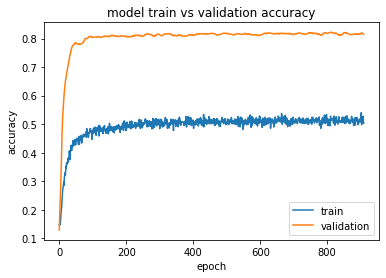

Done.
Test loss: 0.40899598598480225
Test accuracy: 0.8149926066398621
2 0.4 0.01
Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_6 (GAT)                     (None, 64)           91840       input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
gat_7

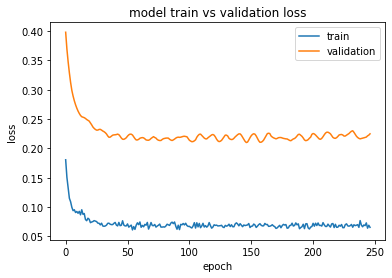

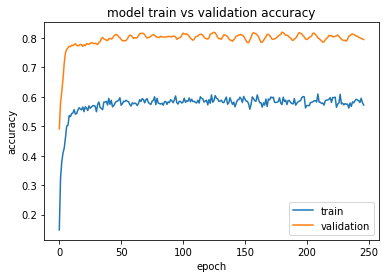

Done.
Test loss: 0.3971046805381775
Test accuracy: 0.7950516939163208
2 0.4 0.001
Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_8 (GAT)                     (None, 64)           91840       input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
gat_

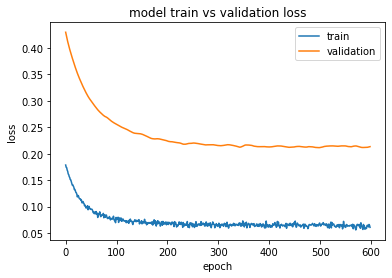

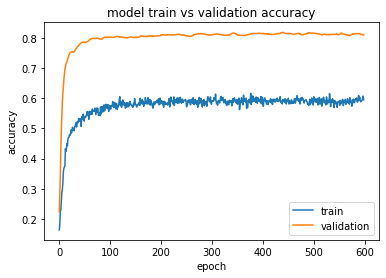

Done.
Test loss: 0.3845110833644867
Test accuracy: 0.8090841770172119
2 0.3 0.01
Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_10 (GAT)                    (None, 64)           91840       input_11[0][0]                   
                                                                 input_12[0][0]                   
__________________________________________________________________________________________________
gat_1

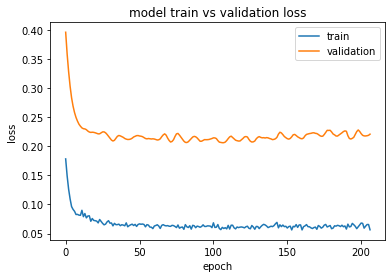

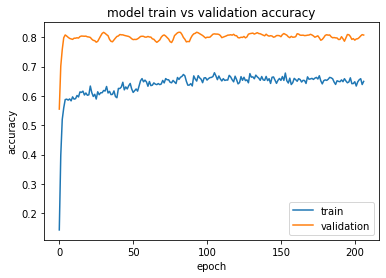

Done.
Test loss: 0.396847665309906
Test accuracy: 0.807607114315033
2 0.3 0.001
Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_12 (GAT)                    (None, 64)           91840       input_13[0][0]                   
                                                                 input_14[0][0]                   
__________________________________________________________________________________________________
gat_13

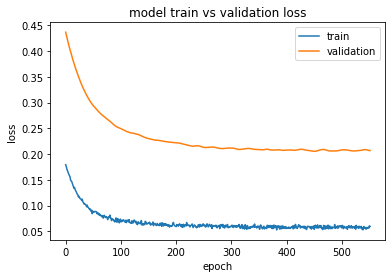

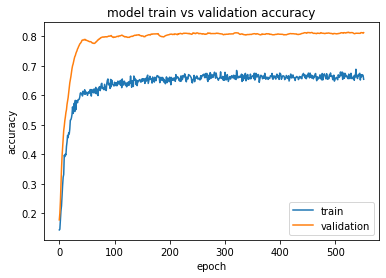

Done.
Test loss: 0.36984682083129883
Test accuracy: 0.811669111251831
3 0.5 0.01
Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_14 (GAT)                    (None, 64)           91840       input_15[0][0]                   
                                                                 input_16[0][0]                   
__________________________________________________________________________________________________
gat_1

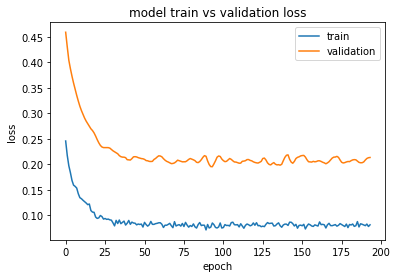

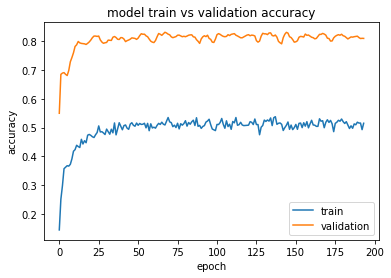

Done.
Test loss: 0.367257297039032
Test accuracy: 0.8094534873962402
3 0.5 0.001
Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_17 (GAT)                    (None, 64)           91840       input_17[0][0]                   
                                                                 input_18[0][0]                   
__________________________________________________________________________________________________
gat_1

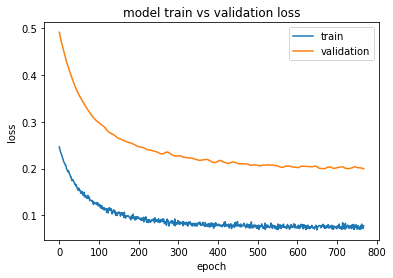

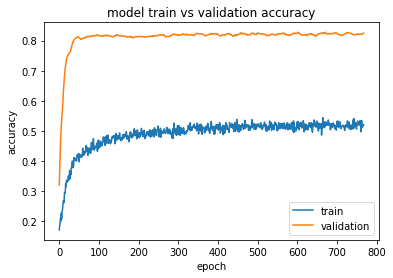

Done.
Test loss: 0.35325008630752563
Test accuracy: 0.8249630928039551
3 0.4 0.01
Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_20 (GAT)                    (None, 64)           91840       input_19[0][0]                   
                                                                 input_20[0][0]                   
__________________________________________________________________________________________________
gat_

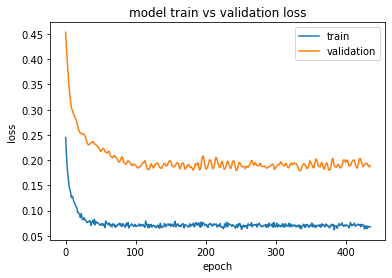

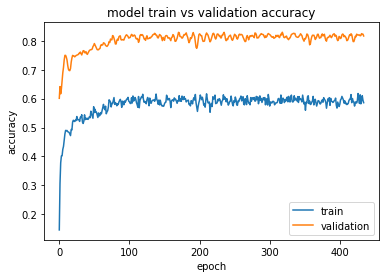

Done.
Test loss: 0.32468870282173157
Test accuracy: 0.8172082901000977
3 0.4 0.001
Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_23 (GAT)                    (None, 64)           91840       input_21[0][0]                   
                                                                 input_22[0][0]                   
__________________________________________________________________________________________________
gat

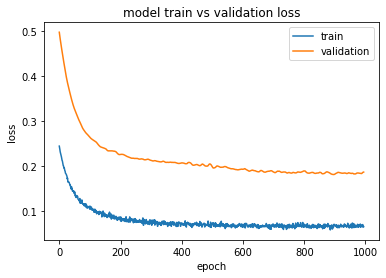

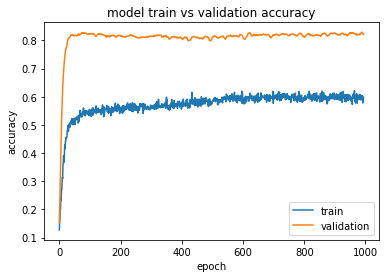

Done.
Test loss: 0.322920024394989
Test accuracy: 0.8216395974159241
3 0.3 0.01
Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_26 (GAT)                    (None, 64)           91840       input_23[0][0]                   
                                                                 input_24[0][0]                   
__________________________________________________________________________________________________
gat_27

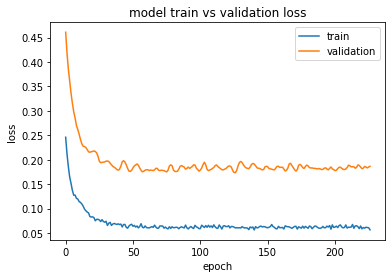

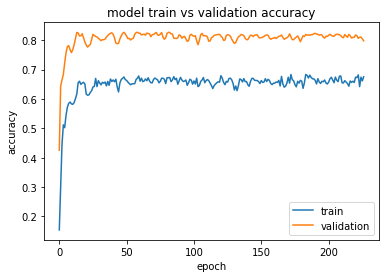

Done.
Test loss: 0.3152962625026703
Test accuracy: 0.7976366281509399
3 0.3 0.001
Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gat_29 (GAT)                    (None, 64)           91840       input_25[0][0]                   
                                                                 input_26[0][0]                   
__________________________________________________________________________________________________
gat_

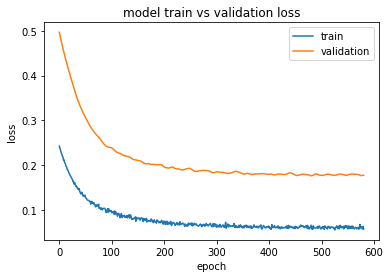

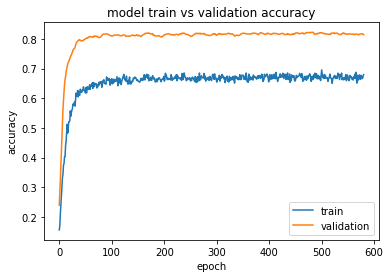

Done.
Test loss: 0.30076906085014343
Test accuracy: 0.8142540454864502


In [25]:
# We try to look at the results by changing some hyperparameters with a grid search

for n in [2, 3]:
  for d in [0.5, 0.4, 0.3]:
    for l in [0.01, 0.001]:

      print(n,d,l)

      epochs=10000                  # Number of training epochs
      batch_size = X.shape[0]       # Number of nodes in the graph
      n_classes = 7                 # Number of classes
      F_1 = 8                       # Output size of GraphAttention layer
      reg = l2(0.0005)              # Factor for l2 regularization
      dropout_rate = d              # Dropout rate between GAT layers
      learning_rate= l              # Learning rate for Adam
      K = 8                         # Number of attention heads in GAT layer (with multihead attention)
      num_layers = n                # Number of layers

      model = build_model(X, F_1, K, reg, num_layers, dropout_rate, n_classes, batch_size, learning_rate)

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), # stochastic gradient descent optimization method that is based on adaptive estimation of first-order and second-order moments, with decay.
              loss='categorical_crossentropy',
              metrics=['accuracy']) # We define the type of loss function (typical choice in classification task is categorical crossentropy) and the metrics to evaluate the accuracy

      validation_data = ([X, A], labels_encoded, val_mask) #Preparing the validation set

      callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)] # defining early stopping procedure to avoid overfitting
      #tb_callback = TensorBoard(batch_size=batch_size)

      hist = model.fit([X, A],
                      labels_encoded,
                      sample_weight=train_mask,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=validation_data,
                      shuffle=False,
                      callbacks = callback, 
                      verbose=0) # Model training and evaluate on validation

      plt.plot(hist.history['loss'])
      plt.plot(hist.history['val_loss'])

      plt.title('model train vs validation loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')

      plt.legend(['train', 'validation'], loc='upper right')
      plt.show()


      plt.plot(hist.history['accuracy'])
      plt.plot(hist.history['val_accuracy'])

      plt.title('model train vs validation accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')

      plt.legend(['train', 'validation'], loc='lower right')
      plt.show()

      eval_results = model.evaluate([X, A],
                              labels_encoded,
                              sample_weight=test_mask,
                              batch_size=batch_size,
                              verbose=0)

      print('Done.\n'
            'Test loss: {}\n'
            'Test accuracy: {}'.format(*eval_results))

## Results

We can see from the grid search that by using a lower dropout we obtain a train accuracy higher than the model with dropout rate of 0.6 and this was the point of our discussion during the implementation of the project.The dropout is the cause of this behaviour. 

Due to disabling neurons, some of information about each sample is lost, and the subsequent layers attempt to construct the answers basing on incomplete representations. So the training loss is higher because we've made it artificially harder for the network to give the right answers. However, during validation all of the units are available, so the network has its full computational power and thus it performs better than in training.

The authors of the paper choose this dropout rate value as a tradeoff between the performances on train and test and from what we have seen also in our results (the train accuracy of the paper's implementation is not available) the model build in this way generalize well.

Moreover, we obtained the best results in our case by using an architecture with 3 GAT layers, a dropout equal to 0.4 and a learning rate of 0.01, that gave us 0.8249 accuracy on test set.




---




# **CITESEER**

To double check the GAT layer we implemented, we try the model also on the *Citeseer* dataset. 

While for *Cora* it was possible to import the data and generate the respective graph correctly, with *Citeseer* we have met an issue in the dimensionality of the graph. In particular, 15 nodes present on the graph are not present in the feature matrix. We have used the dataset imported from the following repo: https://github.com/tkipf/gcn.

In [26]:
# Loading citeseer.zip from local

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving citeseer.zip to citeseer.zip
User uploaded file "citeseer.zip" with length 597885 bytes


In [27]:
!unzip -o citeseer.zip &> /dev/null

In [28]:
# citeseer dataset loading

N, labels, A, X, Y_train, Y_val, Y_test, train_idx, val_idx, test_idx = load_data_citeseer() 

# N -> niìumber of nodes in the graph
# A -> adjacency matrix
# X -> feature matrix
# Y_train, Y_val, Y_test -> tran/val/test labels
# train_idx, test_idx, val_idx -> ranges for train/test/validation


X = preprocess_features(X) #Row-normalize feature matrix and convert to tuple representation
A = A.todense()
A = A + np.eye(A.shape[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/content/preprocess_data.py:115: RuntimeWarning: divide by zero encountered in power
  r_inv = np.power(rowsum, -1).flatten()


Model: "functional_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 3703)]       0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           [(None, 3327)]       0                                            
__________________________________________________________________________________________________
gat_34 (GAT)                    (None, 64)           237120      input_29[0][0]                   
                                                                 input_30[0][0]                   
__________________________________________________________________________________________________
gat_35 (GAT)                    (None, 6)            396         gat_34[0][0]         

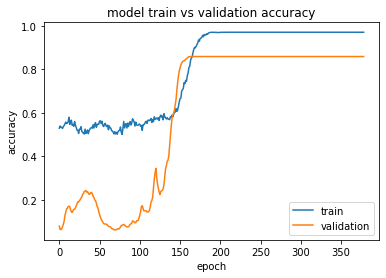

In [30]:
# same structure and hyperparameters as in the paper

epochs=10000                  # Number of training epochs
batch_size = X.shape[0]       # Number of nodes in the graph
n_classes = 6                 # Number of classes
F_1 = 8                       # Output size of GraphAttention layer
reg = l2(0.0005)              # Factor for l2 regularization
dropout_rate = 0.8            # Dropout rate between GAT layers
learning_rate= 0.005          # Learning rate for Adam
K = 8                         # Number of attention heads in GAT layer
num_layers = 2                # Number of layers

   
model = build_model(X, F_1, K, reg, num_layers, dropout_rate, n_classes, batch_size, learning_rate)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

validation_data = ([X, A], Y_val, val_idx)

callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)]
#tb_callback = TensorBoard(batch_size=batch_size)

hist = model.fit([X, A],
                Y_train,
                sample_weight=train_idx,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=validation_data,
                shuffle=False,
                callbacks = callback, 
                verbose=1)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [31]:
model.evaluate([X, A],
                Y_test,
                sample_weight=test_idx,
                batch_size=batch_size,
                verbose=1)

1/1 [==============================] - 0s 16ms/step - loss: 0.5386 - accuracy: 0.7226


[0.5385510921478271, 0.7225728631019592]

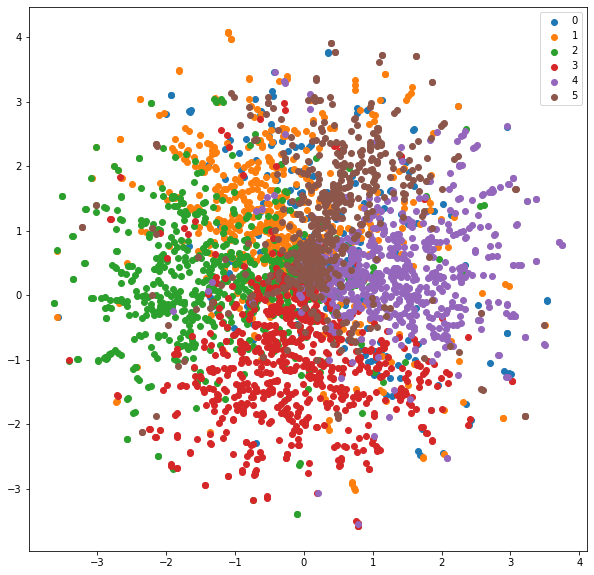

In [32]:
# Get the hidden layer representation after the first GAT layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict([X,A],batch_size=batch_size)

# Get t-SNE Representation
x_tsne = TSNE(n_components=2).fit_transform(activations[0]) 

def plot_tSNE(Y_test,x_tsne):
    color_map = np.argmax(labels, axis=1)
    plt.figure(figsize=(10,10))
    for cl in range(n_classes):
        indices = np.where(color_map==cl)
        indices = indices[0]
        plt.scatter(x_tsne[indices,0], x_tsne[indices, 1], label=cl)
    plt.legend()
    plt.show()
    
plot_tSNE(Y_test,x_tsne)

## Results

Despite we have reached the same accuracy value shown in the paper (0.72), we can notice substantial difference on the accuracy plot with respect to . The trend of the validation accuracy starts with noticeable fluctuations and some spikes before reaching convergence to the final value. This, in our opinion, could be due to different reasons:

+ The training data may be very small (only 120 nodes) resulting in some overfitting, which we have some evidence of.

+ Such rapid fluctuations may be the result of the gradient based optimization algorithm (Adam) overshooting in the optimal direction. The few times the validation error dips are the times when the extent of the updates was beneficial to generalization error.

Unfortunately the paper of interest doesn't propose anything else but the test accuracy values to compare the results obtained on the different benchmarks.